In [1]:
import pandas as pd
import numpy as np

In [2]:
# ML packages/estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# Transformers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

In [3]:
df = pd.read_csv("C:/Users/USER/Desktop/hcvdat0.csv")

In [4]:
df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
df.shape


(615, 14)

In [6]:
df.columns


Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [7]:
df.dtypes


Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [9]:
df["Category"]

0      0=Blood Donor
1      0=Blood Donor
2      0=Blood Donor
3      0=Blood Donor
4      0=Blood Donor
           ...      
610      3=Cirrhosis
611      3=Cirrhosis
612      3=Cirrhosis
613      3=Cirrhosis
614      3=Cirrhosis
Name: Category, Length: 615, dtype: object

In [10]:
df["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [11]:
cat_dict = {'0=Blood Donor':0, '0s=suspect Blood Donor':0, '1=Hepatitis':1,
       '2=Fibrosis':2, '3=Cirrhosis':3}

In [12]:
cat_dict

{'0=Blood Donor': 0,
 '0s=suspect Blood Donor': 0,
 '1=Hepatitis': 1,
 '2=Fibrosis': 2,
 '3=Cirrhosis': 3}

In [13]:
# 1st approach
df["Category"].map(cat_dict)

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: Category, Length: 615, dtype: int64

In [14]:
df["Category"].str.split("=").str.get(0).unique()

array(['0', '0s', '1', '2', '3'], dtype=object)

In [15]:
# 2nd approach
df["Category"].str.split("=").str.get(0).str.replace("s","").unique()

array(['0', '1', '2', '3'], dtype=object)

In [16]:
# There were some 0=Blood Donor', and '0s=suspect Blood Donor'
df["Category"].str.split("=").str.get(0).str.replace("s","").astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: Category, Length: 615, dtype: int32

In [17]:
# 3rd approach

# df.pipe(fxn,col)
#   return df

def split_numbers_from_text(df_x, col):
    df_x[col] = df_x[col].str.split("=").str.get(0).str.replace("s","")
    return df_x

In [18]:
df2 = df.copy()

In [19]:
df2.pipe(split_numbers_from_text,"Category")

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [20]:
def gender_map(df_x):
    gender_dict = {"f":0,"m":1}
    df_x["Sex"] = df_x["Sex"].map(gender_dict)
    return df_x

In [21]:
df2.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [22]:
df2.pipe(gender_map)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [23]:
newdata = df.copy()


In [24]:
newdata.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [25]:
newdata.pipe(split_numbers_from_text,"Category").pipe(gender_map)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [26]:
# ML Pipelines

newdata.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [27]:
df = newdata

In [28]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [29]:
df = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT','Category']]

In [30]:
df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [31]:
df.isnull().sum()
# df.isnull().sum().sum() Total number of missing values

Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
Category     0
dtype: int64

In [32]:
df.fillna(0,inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
df.isnull().sum()

Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
Category    0
dtype: int64

In [34]:
# Feature scaling
# Scaling mean(0-1) and std=1 scale(mean=0,std=1)(standardscaler)
# normalization (minmaxscaler)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [36]:
warnings.filterwarnings('ignore')

In [37]:
df['Category'].value_counts()

0    540
3     30
1     24
2     21
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

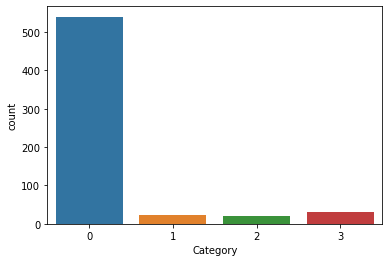

In [38]:
sns.countplot(df['Category'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

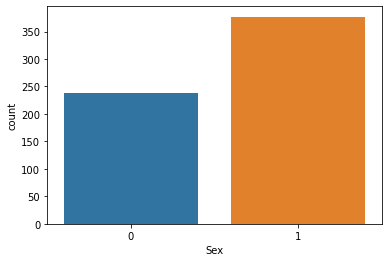

In [39]:
sns.countplot(df['Sex'])

<Figure size 1440x720 with 0 Axes>

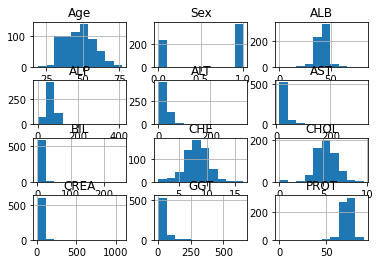

In [40]:
plt.figure(figsize=(20,10))
df.hist()
plt.show()

In [41]:
# # Narrative
# * Standardize/cale them via StandardScaler when lookimg like a Normal Bell Curve
# * Normalization(minmaxscaler) - this can affect accuracy

In [42]:
# features & Labels
Xfeatures = df.drop('Category', axis=1)
ytarget = df['Category']

In [43]:
ytarget.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: object

In [44]:
Xfeatures.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [45]:
standard_scaler = StandardScaler()
Xfeatures_scaled = standard_scaler.fit_transform(Xfeatures)

In [46]:
Xfeatures_scaled

array([[-1.53361617,  0.79454373, -0.50791405, ...,  0.49707027,
        -0.50228619, -0.47785197],
       [-1.53361617,  0.79454373, -0.50791405, ..., -0.14658961,
        -0.43820313,  0.74657567],
       [-1.53361617,  0.79454373,  0.88977625, ...,  0.09478284,
        -0.11595686,  1.20369532],
       ...,
       [ 1.65143725, -1.25858397, -2.08863523, ..., -0.29342452,
         0.45163601,  1.64448927],
       [-0.1401553 , -1.25858397, -1.42306842, ..., -0.58910578,
         0.19164186, -0.15133793],
       [ 1.15377266, -1.25858397, -0.92389331, ..., -0.28739021,
        -0.1013093 , -0.64110898]])

In [47]:
Xfeatures_scaled_df = pd.DataFrame(Xfeatures_scaled, columns=Xfeatures.columns)

In [48]:
Xfeatures_scaled_df.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.533616,0.794544,-0.507914,-0.490766,-0.813408,-0.383693,-0.198236,-0.574734,-1.563246,0.497070,-0.502286,-0.477852
1,-1.533616,0.794544,-0.507914,0.142923,-0.408758,-0.305057,-0.381375,1.349161,-0.366503,-0.146590,-0.438203,0.746576
2,-1.533616,0.794544,0.889776,0.299565,0.306255,0.538767,-0.269457,0.291926,-0.061600,0.094783,-0.115957,1.203695
3,-1.533616,0.794544,0.274127,-0.508567,0.086251,-0.368571,0.381706,-0.393234,-0.412238,-0.025903,-0.104971,0.615970
4,-1.533616,0.794544,-0.391440,0.278205,0.164824,-0.302033,-0.091404,0.432588,-0.732386,-0.106361,-0.176378,-0.526829


In [49]:
# Splitting data

X_train_scaled,X_test_scaled,y_train_scaled,  y_test_scaled= train_test_split(Xfeatures_scaled_df,ytarget, test_size=0.3,random_state=42)

In [50]:
# model builder

lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled,y_train_scaled)

LogisticRegression()

In [51]:
lr_scaled.score(X_test_scaled,y_test_scaled)

0.9135135135135135

In [52]:
# Splitting data using unscaled data

X_train,X_test,y_train,  y_test= train_test_split(Xfeatures,ytarget, test_size=0.3,random_state=42)

In [53]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [54]:
lr.score(X_test,y_test)

0.9243243243243243

In [55]:
# USING A PIPELINE FOR ESTIMATORS

# * Transfromers(Data to Data)
# - fit & transform
# * Estimators(Data to Model)
# - fit & predict

In [56]:
# PIPELINE CONSTRUCTOR
# Pipleine takes a list of tuples - Transformer, then Estimator.

pipe_lr = Pipeline([('standar_scaler', StandardScaler()),("lr_model",LogisticRegression())])

In [57]:
# fit on unscaled dataset/ raw dataset
pipe_lr = pipe_lr.fit(X_train,y_train)

In [58]:
# getting all attributes from pipeline
dir(pipe_lr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decisio

In [59]:
pipe_lr.steps

[('standar_scaler', StandardScaler()), ('lr_model', LogisticRegression())]

In [60]:
pipe_lr.named_steps

{'standar_scaler': StandardScaler(), 'lr_model': LogisticRegression()}

In [61]:
pipe_lr.named_steps['standar_scaler']

StandardScaler()

In [62]:
# details or defaults defined within the parenthesis of the function call, i.e. StandardScaler and LogisticRegression

pipe_lr.get_params()

{'memory': None,
 'steps': [('standar_scaler', StandardScaler()),
  ('lr_model', LogisticRegression())],
 'verbose': False,
 'standar_scaler': StandardScaler(),
 'lr_model': LogisticRegression(),
 'standar_scaler__copy': True,
 'standar_scaler__with_mean': True,
 'standar_scaler__with_std': True,
 'lr_model__C': 1.0,
 'lr_model__class_weight': None,
 'lr_model__dual': False,
 'lr_model__fit_intercept': True,
 'lr_model__intercept_scaling': 1,
 'lr_model__l1_ratio': None,
 'lr_model__max_iter': 100,
 'lr_model__multi_class': 'auto',
 'lr_model__n_jobs': None,
 'lr_model__penalty': 'l2',
 'lr_model__random_state': None,
 'lr_model__solver': 'lbfgs',
 'lr_model__tol': 0.0001,
 'lr_model__verbose': 0,
 'lr_model__warm_start': False}

In [63]:
pipe_lr.steps[0][1]

StandardScaler()

In [64]:
pipe_lr.steps[0][1].get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [65]:
pipe_lr.score(X_test,y_test)

0.9135135135135135

In [66]:
# Compare accuracy for standard scaling and normalized data

pipe_lr_norm = Pipeline([('minmax_scaler', MinMaxScaler()),("lr_model",LogisticRegression())])

In [67]:
pipe_lr_norm

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('lr_model', LogisticRegression())])

In [68]:
pipe_lr_norm = pipe_lr_norm.fit(X_train,y_train)
# pipe_lr_norm.score(X_test,y_test)

In [69]:
pipe_lr_norm.score(X_test,y_test)

0.8594594594594595

In [70]:
# Accuracy for this case:  Unscaled > Standard scaled data > Normalized data

In [71]:
# make predictions
X_test.iloc[0]


Age     55.00
Sex      1.00
ALB     28.10
ALP     65.50
ALT     16.60
AST     17.50
BIL      2.80
CHE      5.58
CHOL     4.39
CREA    65.00
GGT     26.20
PROT    62.40
Name: 248, dtype: float64

In [72]:
X_test.iloc[0].tolist()

[55.0, 1.0, 28.1, 65.5, 16.6, 17.5, 2.8, 5.58, 4.39, 65.0, 26.2, 62.4]

In [73]:
example1 = X_test.iloc[0].tolist()

In [74]:
# known target value
y_test[0]

'0'

In [75]:
sample = np.array(example1).reshape(1,-1)

In [77]:
print("LR Scaled",pipe_lr.predict(sample))
print("LR Normalized",pipe_lr_norm.predict(sample))

LR Scaled ['0']
LR Normalized ['0']


In [78]:
# Probability of each category,i.e. 0,1,2,3

print("LR Scaled",pipe_lr.predict_proba(sample))
print("LR Normalized",pipe_lr_norm.predict_proba(sample))

LR Scaled [[9.94399719e-01 8.44097028e-05 3.28199154e-04 5.18767258e-03]]
LR Normalized [[0.92375654 0.01533653 0.015507   0.04539993]]


In [79]:
# '0' has the largest probability for both scaled and normalized data

In [80]:
#USING MAKE PIPELINE
# You dont need to name the steps

new_pipe_lr = make_pipeline(StandardScaler(),LogisticRegression())

In [81]:
new_pipe_lr = new_pipe_lr.fit(X_train,y_train)

In [82]:
print("LR Using Make Pipeline",new_pipe_lr.predict_proba(sample))

LR Using Make Pipeline [[9.94399719e-01 8.44097028e-05 3.28199154e-04 5.18767258e-03]]
